In [103]:
import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
import matplotlib.pyplot as plt
import numpy as np #foundational package for scientific computing
import scipy as sp #collection of functions for scientific computing and advance mathematics
import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
import sklearn #collection of machine learning algorithms
#misc libraries
import random
import time
import seaborn as sns
from pandas import read_excel

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

pandas version: 0.25.1
-------------------------


In [104]:
#data = read_excel(r"C:\Users\S2019\Desktop\yixing\Data\data.xls", header=0, index_col=0)
# data = read_excel(r"C:\Users\S2019\Desktop\yixing\Data\SILO.xls", header=0, index_col=0)
data=read_excel(r"C:\Users\H\Desktop\yixing\Data\darwin.xls",header=0, index_col=0) 
# data=read_excel(r"C:\Users\H\Desktop\yixing\Data\addington.xls",header=0, index_col=0) 
# data=read_excel(r"C:\Users\H\Desktop\yixing\Data\data.xls",header=0, index_col=0)  
data=pd.DataFrame(data,dtype=np.float)
data.head(5)

,daily_rain,max_temp,min_temp,vp,vp_deficit,evap_pan,evap_syn,evap_comb,evap_morton_lake,radiation,rh_tmax,rh_tmin,et_short_crop,et_tall_crop,et_morton_actual,et_morton_potential,et_morton_wet,mslp
date,,,,,,,,,,,,,,,,,,
1889-01-01,0.0,32.6,25.1,31.8,12.4,6.1,5.7,5.7,5.2,16.6,64.7,99.8,4.1,4.8,4.6,5.6,5.1,1008.0
1889-01-02,11.0,32.1,24.8,32.0,11.1,6.0,5.6,5.6,5.3,17.1,66.9,100.0,4.1,4.7,4.9,5.4,5.2,1008.0
1889-01-03,10.4,32.2,24.6,31.0,12.2,5.8,5.7,5.7,5.2,16.7,64.5,100.0,4.1,4.8,4.6,5.6,5.1,1007.9
1889-01-04,6.7,32.0,24.4,30.8,11.9,5.8,5.6,5.6,5.1,16.3,64.8,100.0,4.0,4.7,4.5,5.4,5.0,1007.8
1889-01-05,21.7,31.9,24.7,31.2,11.5,5.8,5.5,5.5,4.9,15.7,66.0,100.0,3.9,4.5,4.3,5.2,4.8,1007.8


In [105]:
#查看表格各列有没有缺失值
data.isnull().any()
print(data.isnull().any())

daily_rain             False
max_temp               False
min_temp               False
vp                     False
vp_deficit             False
evap_pan               False
evap_syn               False
evap_comb              False
evap_morton_lake       False
radiation              False
rh_tmax                False
rh_tmin                False
et_short_crop          False
et_tall_crop           False
et_morton_actual       False
et_morton_potential    False
et_morton_wet          False
mslp                   False
dtype: bool


In [106]:
#查看表格缺失值在哪个位置
data[data.isnull().values==True]

,daily_rain,max_temp,min_temp,vp,vp_deficit,evap_pan,evap_syn,evap_comb,evap_morton_lake,radiation,rh_tmax,rh_tmin,et_short_crop,et_tall_crop,et_morton_actual,et_morton_potential,et_morton_wet,mslp
date,,,,,,,,,,,,,,,,,,


In [107]:
# f,ax=plt.subplots(figsize = (14, 10))

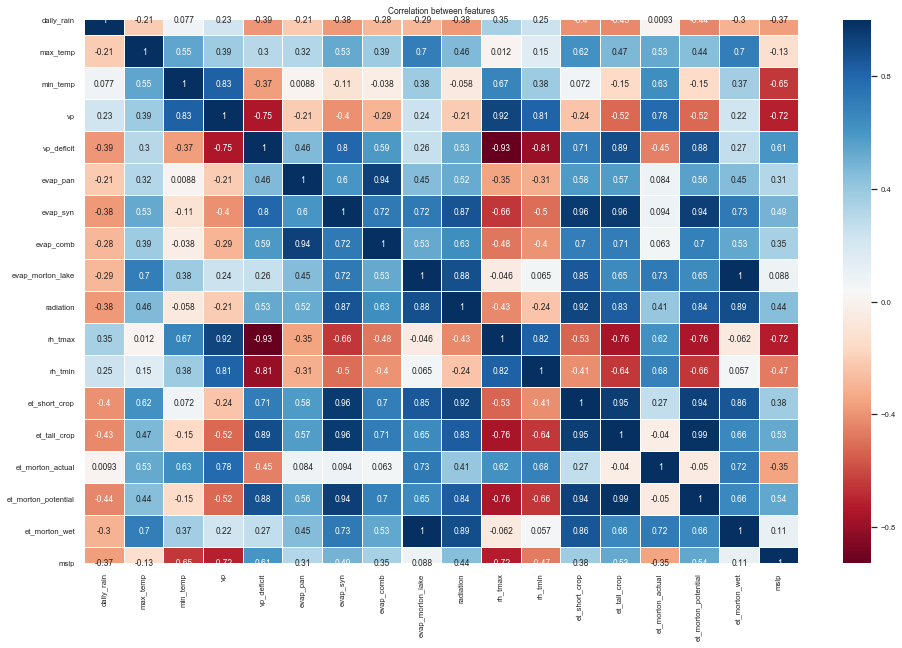

In [109]:
f, ax= plt.subplots(figsize = (16, 10))
corr = data.corr(method='pearson')
# print(corr)
sns.heatmap(corr,annot=True,cmap='RdBu', linewidths = 0.05, ax = ax)
# 设置Axes的标题
ax.set_title('Correlation between features')
plt.savefig("热力图.png",dpi=600)#保存图片，分辨率为600
plt.show()

In [63]:
# f, ax= plt.subplots(figsize = (14, 10))
# corr=data.corr(method='pearson')
# print(corr)

In [64]:
# sns.set(font_scale=0.7)

In [65]:
f, ax= plt.subplots(figsize = (14, 10))
corr=data.corr(method='pearson')
sns.heatmap(corr,
            annot=True,  # 显示相关系数的数据
            center=0.5,  # 居中
            fmt='.2f',  # 只显示两位小数
            linewidths=0.1,  # 设置每个单元格的距离
            linecolor='white',  # 设置间距线的颜色
            vmin=0, vmax=1,  # 设置数值最小值和最大值
            xticklabels=True, yticklabels=True,  # 显示x轴和y轴
            square=True,  # 每个方格都是正方形
            cbar=True,  # 绘制颜色条          
            cmap='coolwarm_r',  # 设置热力图颜色
            cbar_kws={'shrink':.9 },
            annot_kws={'fontsize':12 }
            ax=ax
            )
ax.set_title('Correlation between features')
plt.show()
# plt.savefig("热力图.png",dpi=600)#保存图片，分辨率为600
# plt.ion() #显示图片


SyntaxError: invalid syntax (<ipython-input-65-1aa6cfa69cc7>, line 16)

In [ ]:
sns.heatmap(corr.cmap='RdBu',linewidths=0.05,ax=ax)

In [31]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(18, 10))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=3, size=15)

TypeError: object of type <class 'float'> cannot be safely interpreted as an integer.

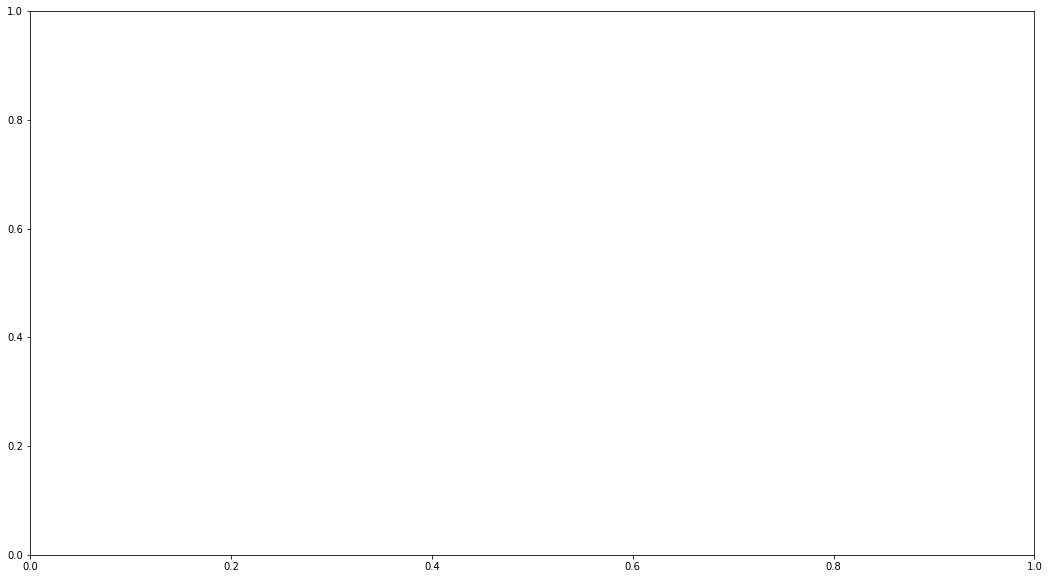

In [32]:
correlation_heatmap(data)